# 数据预处理

In [1]:
import pandas as pd #导入Pandas
df_sales = pd.read_csv('易速鲜花订单记录.csv') #载入数据
df_sales.head() #显示头几行数据 

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市
0,536374,21258,6/1/2020 9:09,五彩玫瑰五支装,32,10.95,15100,北京
1,536376,22114,6/1/2020 9:32,茉莉花白色25枝,48,3.45,15291,上海
2,536376,21733,6/1/2020 9:32,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海
3,536378,22386,6/1/2020 9:37,百合粉色10花苞,10,1.95,14688,北京
4,536378,85099C,6/1/2020 9:37,橙黄香槟色康乃馨,10,1.95,14688,北京


## 整理日期格式

In [2]:
df_sales = pd.read_csv('易速鲜花订单记录.csv') #载入数据
print('日期范围（格式转化前）: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max())) #显示日期范围（格式转换前）
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期']) #转换日期格式
print('日期范围（格式转化后）: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max()))#显示日期范围

日期范围（格式转化前）: 1/1/2021 10:11 ~ 9/9/2020 9:20
日期范围（格式转化后）: 2020-06-01 09:09:00 ~ 2021-06-09 12:31:00


In [3]:
df_sales = df_sales.loc[df_sales['消费日期'] < '2021-06-01'] #只保留整月数据
print('日期范围（删除不完整的月份）: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max())) #显示日期范围

日期范围（删除不完整的月份）: 2020-06-01 09:09:00 ~ 2021-05-31 17:39:00


## 数据可视化

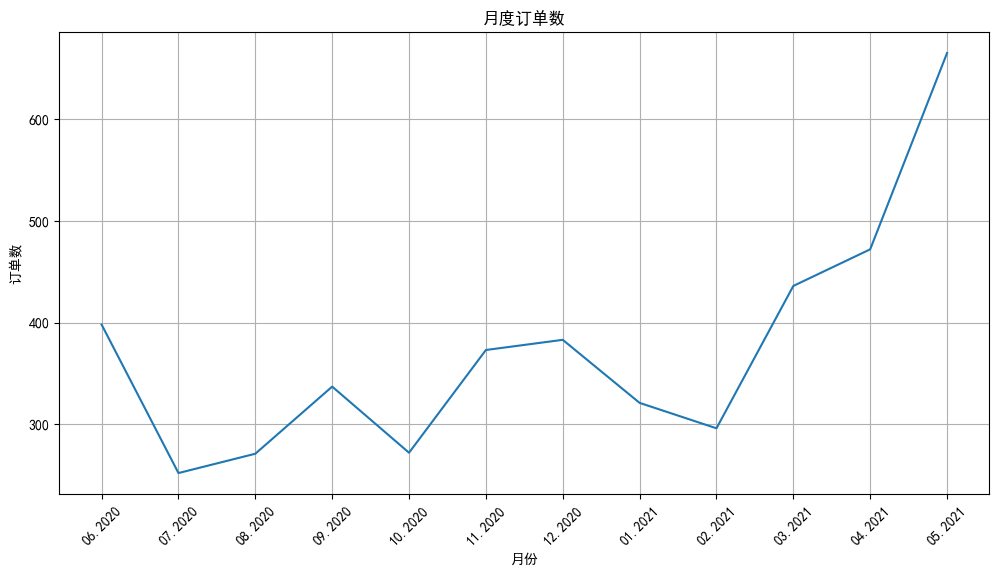

In [4]:
import matplotlib.pyplot as plt #导入Matplotlib的pyplot模块
plt.rcParams['font.family'] = ['SimHei'] #或者 ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
#构建月度的订单数的DataFrame
df_orders_monthly = df_sales.set_index('消费日期')['订单号'].resample('M').nunique()
#设定绘图的画布
ax = pd.DataFrame(df_orders_monthly.values).plot(grid=True,figsize=(12,6),legend=False)
ax.set_xlabel('月份') # X轴label
ax.set_ylabel('订单数') # Y轴Label
ax.set_title('月度订单数') # 图题
#设定X轴月份显示格式
plt.xticks(
    range(len(df_orders_monthly.index)), 
    [x.strftime('%m.%Y') for x in df_orders_monthly.index], 
    rotation=45)
plt.show() # 绘图

## 数据清洗

In [5]:
df_sales = df_sales.drop_duplicates() #删除重复的数据行

## 特征工程

In [6]:
df_sales['总价'] = df_sales['数量'] * df_sales['单价'] #计算每单的总价
df_sales.head() #显示头几行数据  

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京,350.4
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海,165.6
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,163.2
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京,19.5
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京,19.5


### 构建User用户表

In [7]:
df_sales_3m = df_sales[(df_sales.消费日期 > '2020-06-01') & (df_sales.消费日期 <= '2020-08-30')] #构建仅含头三个月数据的数据集
df_sales_3m.reset_index(drop=True) #重置索引

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京,350.40
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海,165.60
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,163.20
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京,19.50
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京,19.50
...,...,...,...,...,...,...,...,...,...
14564,545190,22937,2020-08-29 15:32:00,产品说明掩码,6,18.00,15656,苏州,108.00
14565,545190,22722,2020-08-29 15:32:00,产品说明掩码,4,39.50,15656,苏州,158.00
14566,545190,22457,2020-08-29 15:32:00,产品说明掩码,60,3.00,15656,苏州,180.00
14567,545190,22464,2020-08-29 15:32:00,产品说明掩码,12,25.00,15656,苏州,300.00


In [8]:
df_user = pd.DataFrame(df_sales['用户码'].unique()) #生成以用户码为主键的结构
df_user.columns = ['用户码'] #设定字段名
df_user.head() #显示头几行数据
df_R_value = df_sales_3m.groupby('用户码').消费日期.max().reset_index() #找到每个用户的最近消费日期，构建df_R_value对象
df_R_value.columns = ['用户码','最近购买日期'] #设定字段名
df_R_value['R值'] = (df_R_value['最近购买日期'].max() - df_R_value['最近购买日期']).dt.days #计算最新日期与上次消费日期的天数
df_user = pd.merge(df_user, df_R_value[['用户码','R值']], on='用户码') #把上次消费距最新日期的天数（R值）合并至df_user结构
df_F_value = df_sales_3m.groupby('用户码').消费日期.count().reset_index() #计算每个用户消费次数，构建df_F_value对象
df_F_value.columns = ['用户码','F值'] #设定字段名
df_user = pd.merge(df_user, df_F_value[['用户码','F值']], on='用户码') #把消费频率(F值)整合至df_user结构
df_M_value = df_sales_3m.groupby('用户码').总价.sum().reset_index() #计算每个用户三个月消费总额，构建df_M_value对象
df_M_value.columns = ['用户码','M值'] #设定字段名
df_user = pd.merge(df_user, df_M_value, on='用户码') #把消费总额整合至df_user结构
df_user #显示用户表结构

,用户码,R值,F值,M值
0,15100,45,6,635.10
1,15291,35,35,1329.95
2,14688,6,85,1472.28
3,15311,5,715,12711.66
4,15862,89,64,354.23
...,...,...,...,...
365,15951,1,22,375.17
366,14745,1,7,240.60
367,15724,0,5,103.65
368,15874,0,5,584.35


## 构建标签

In [9]:
df_user_1y = df_sales.groupby('用户码')['总价'].sum().reset_index() #计算每个用户整年消费总额，构建df_user_1y对象
df_user_1y.columns = ['用户码','年度LTV'] #设定字段名
df_user_1y.head() #显示头几行数据
df_LTV = pd.merge(df_user, df_user_1y, on='用户码', how='left') #构建整体LTV训练数据集
df_LTV #显示df_LTV

,用户码,R值,F值,M值,年度LTV
0,15100,45,6,635.10,635.10
1,15291,35,35,1329.95,4596.51
2,14688,6,85,1472.28,4449.48
3,15311,5,715,12711.66,58218.04
4,15862,89,64,354.23,659.73
...,...,...,...,...,...
365,15951,1,22,375.17,375.17
366,14745,1,7,240.60,1167.16
367,15724,0,5,103.65,212.30
368,15874,0,5,584.35,4330.67


## 创建特征集和标签集

In [10]:
X = df_LTV.drop(['用户码','年度LTV'],axis=1) #特征集
X.head() #显示特征集

,R值,F值,M值
0,45,6,635.10
1,35,35,1329.95
2,6,85,1472.28
3,5,715,12711.66
4,89,64,354.23


In [11]:
y = df_LTV['年度LTV'] #标签集
y.head() #显示标签集

0      635.10
1     4596.51
2     4449.48
3    58218.04
4      659.73
Name: 年度LTV, dtype: float64

## 拆分训练集、验证集和测试集

In [12]:
from sklearn.model_selection import train_test_split
# 先拆分训练集和其它集
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7,random_state = 36)
# 再把其它集拆分成验证集和测试集 
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state = 36)

## 第一种缩放 标准化

In [13]:
from sklearn.preprocessing import StandardScaler #导入标准化缩放器
scaler = StandardScaler() #创建标准化缩放器
X_train_standard = scaler.fit_transform(X_train) #拟合并转换训练集数据
X_valid_standard = scaler.transform(X_valid) #转换验证集数据
X_test_standard = scaler.transform(X_test) #转换测试集数据

这段代码首先从`sklearn.preprocessing`模块中导入`StandardScaler`类，然后创建一个`StandardScaler`对象，并使用这个对象对数据进行标准化处理。让我们分解这段代码：

1. `from sklearn.preprocessing import StandardScaler`：这一行代码从`sklearn.preprocessing`模块中导入`StandardScaler`类。这个类用于对数据进行标准化处理，即将数据缩放为均值为0，标准差为1的标准正态分布。

2. `scaler = StandardScaler()`：这一行代码创建一个`StandardScaler`对象，用于之后的缩放操作。

3. `X_train_standard = scaler.fit_transform(X_train)`：这一行代码对训练集中的特征数据执行两个操作，即“拟合”（`fit`）和“转换”（`transform`）。首先，用训练集数据（`X_train`）计算出特征数据的均值和标准差（拟合操作）。接着，用这些均值和标准差对训练集数据执行标准化处理（转换操作）。最后，将标准化后的训练集数据赋值给`X_train_standard`变量。

4. `X_valid_standard = scaler.transform(X_valid)` 和 `X_test_standard = scaler.transform(X_test)`：这两行代码分别对验证集和测试集的特征数据进行标准化处理。注意，这里只执行“转换”（`transform`）操作，而不再执行“拟合”（`fit`）操作。这是因为我们已经根据训练集数据得到了均值和标准差，应该使用相同的均值和标准差对验证集和测试集进行标准化处理，以保持数据集之间的一致性。

现在，你已经成功地使用`StandardScaler`对特征数据进行了标准化处理，得到了如下结果：

- `X_train_standard`：标准化后的训练集特征矩阵；
- `X_valid_standard`：标准化后的验证集特征矩阵；
- `X_test_standard`：标准化后的测试集特征矩阵。

这样处理后的数据可以帮助机器学习算法更快地收敛，并且对于使用欧式距离（或其他基于距离的度量）的算法，可以获得更好的性能。

## 第二种缩放 归一化

In [14]:
from sklearn.preprocessing import MinMaxScaler #导入归一化缩放器
scaler = MinMaxScaler() #创建归一化缩放器
X_train_minmax = scaler.fit_transform(X_train) #拟合并转换训练集数据
X_valid_minmax = scaler.transform(X_valid) #转换验证集数据
X_test_minmax = scaler.transform(X_test) #转换测试集数据

这段代码使用了`sklearn.preprocessing`库中的`MinMaxScaler`类进行数据归一化。让我们详细解释一下这个过程：

1. `from sklearn.preprocessing import MinMaxScaler`：这一行代码从`sklearn.preprocessing`模块中导入`MinMaxScaler`类。这个类用于将数据进行线性归一化，使数据在一个指定区间（默认为[0, 1]）内。

2. `scaler = MinMaxScaler()`：这一行代码创建一个`MinMaxScaler`对象，用于之后的缩放操作。

3. `X_train_minmax = scaler.fit_transform(X_train)`：这一行代码对训练集中的特征数据执行两个操作：拟合（`fit`）和转换（`transform`）。首先，根据训练集数据（`X_train`）计算出数据的最小值和最大值（拟合操作）。然后使用这些最小值和最大值将训练集中的数据线性归一化到[0, 1]区间（转换操作）。最后将归一化后的训练集数据赋值给`X_train_minmax`变量。

4. `X_valid_minmax = scaler.transform(X_valid)` 和 `X_test_minmax = scaler.transform(X_test)`：这两行代码分别将验证集和测试集的特征数据进行归一化处理。注意，这里只需要执行转换（`transform`）操作，而不需要再次执行拟合（`fit`）操作。这是因为我们已经根据训练集数据得到了最小值和最大值，应该使用相同的极值对验证集和测试集进行归一化，以保持数据集之间的一致性。

经过上述操作，你已经成功地使用`MinMaxScaler`对特征数据进行了归一化处理，得到了如下结果：

- `X_train_minmax`：归一化后的训练集特征矩阵；
- `X_valid_minmax`：归一化后的验证集特征矩阵；
- `X_test_minmax`：归一化后的测试集特征矩阵。

归一化处理后的数据对于基于距离的机器学习算法（如k-近邻、SVM等）非常有用，因为这些算法对不同尺度的数据特征可能导致计算距离的失真。通过将所有特征缩放到相同范围，这些算法可以更好地对不同特征之间的距离进行评估。

# 训练模型

In [15]:
from sklearn.ensemble import RandomForestRegressor #导入随机森林回归模型
model_rfr = RandomForestRegressor() #创建随机森林回归模型
model_rfr_standard = RandomForestRegressor() #创建随机森林回归模型
model_rfr_minmax = RandomForestRegressor() #创建随机森林回归模型

这段代码从sklearn.ensemble库中导入了RandomForestRegressor类，并创建了3个随机森林回归模型的实例。让我们仔细看看这些代码的作用：

from sklearn.ensemble import RandomForestRegressor：这一行代码从sklearn.ensemble模块中导入RandomForestRegressor类。随机森林是一种集成模型，它通过创建多个决策树并将它们的预测结果综合起来来进行回归或分类。在本例中，我们使用的是回归版本的随机森林模型，即RandomForestRegressor。

model_rfr = RandomForestRegressor()：这一行代码使用默认参数创建了一个RandomForestRegressor对象，用于之后的训练和预测。这个对象将使用原始的未缩放特征数据进行训练。

model_rfr_standard = RandomForestRegressor()：这一行代码同样创建了一个RandomForestRegressor对象。这个对象将使用经过标准化处理后的特征数据进行训练（均值为0，标准差为1的数据）。

model_rfr_minmax = RandomForestRegressor()：最后，这一行代码创建了第三个RandomForestRegressor对象。这个对象将使用经过归一化处理后的特征数据进行训练（数据在[0, 1]区间内）。

现在，你已经创建了3个随机森林回归模型。接下来，你需要将这些模型分别使用未缩放数据、标准化后的数据和归一化后的数据进行训练，然后使用验证集或测试集评估它们的性能。请注意，虽然随机森林模型通常不受特征缩放的影响，但在某些特定的问题或数据集上，使用缩放后的数据仍可能对模型性能产生影响

In [16]:
model_rfr.fit(X_train, y_train) #拟合随机森林模型
model_rfr_standard.fit(X_train_standard, y_train) #拟合随机森林模型
model_rfr_minmax.fit(X_train_minmax, y_train) #拟合随机森林模型

RandomForestRegressor()

这段代码的主要目的是使用不同版本的特征数据来训练先前创建的3个随机森林回归模型。让我们详细了解一下每行代码的作用：

1. `model_rfr.fit(X_train, y_train)`：这一行代码使用原始的未缩放特征数据（`X_train`）和对应的目标值（`y_train`）来训练第一个随机森林回归模型（`model_rfr`）。

2. `model_rfr_standard.fit(X_train_standard, y_train)`：这一行代码使用标准化后的特征数据（`X_train_standard`）和对应的目标值（`y_train`）来训练第二个随机森林回归模型（`model_rfr_standard`）。标准化后的数据具有均值为0，标准差为1的特征。

3. `model_rfr_minmax.fit(X_train_minmax, y_train)`：最后，这一行代码使用归一化后的特征数据（`X_train_minmax`）和对应的目标值（`y_train`）来训练第三个随机森林回归模型（`model_rfr_minmax`）。归一化后的数据在[0, 1]区间内。

经过上述操作，你已经成功地训练了3个随机森林回归模型。接下来的任务是使用这些模型对验证集或测试集上的数据进行预测，然后使用一些评估指标（如均方误差或R²分数）来衡量这些模型的性能。这将帮助你了解哪种数据处理方式（原始数据、标准化处理或归一化处理）在这个特定问题上可能会带来更好的性能。注意，虽然随机森林模型通常对特征缩放不敏感，但在某些特定情况下，使用缩放后的数据可能仍然对模型性能产生影响。

# 评估模型

In [17]:
from sklearn.metrics import r2_score,   median_absolute_error #导入Sklearn评估模块
print('验证集上的R平方分数-随机森林（无缩放）: %0.4f' % r2_score(y_valid, model_rfr.predict(X_valid)))
print('验证集上的R平方分数-随机森林（标准化）: %0.4f' % r2_score(y_valid, model_rfr_standard.predict(X_valid_standard)))
print('验证集上的R平方分数-随机森林（归一化）: %0.4f' % r2_score(y_valid, model_rfr_minmax.predict(X_valid_minmax)))

验证集上的R平方分数-随机森林（无缩放）: 0.5577
验证集上的R平方分数-随机森林（标准化）: 0.5591
验证集上的R平方分数-随机森林（归一化）: 0.5031


这段代码用于评估3个随机森林回归模型在验证集上的性能。我们使用了R²分数作为评估指标，并分别为未缩放数据、标准化数据和归一化数据的模型计算了R²分数。

首先，导入所需的评估指标：
```python
from sklearn.metrics import r2_score, median_absolute_error
```
这行代码从`sklearn.metrics`模块中导入了两个评估指标：一个是R²分数 (`r2_score`)，另一个是中位绝对误差（`median_absolute_error`）。在这个例子中，我们只使用了R²分数来评估模型性能。

接下来，计算R²分数并打印结果：
```python
print('验证集上的R平方分数-随机森林（无缩放）: %0.4f' % r2_score(y_valid, model_rfr.predict(X_valid)))
print('验证集上的R平方分数-随机森林（标准化）: %0.4f' % r2_score(y_valid, model_rfr_standard.predict(X_valid_standard)))
print('验证集上的R平方分数-随机森林（归一化）: %0.4f' % r2_score(y_valid, model_rfr_minmax.predict(X_valid_minmax)))
```
这三行代码分别计算了使用原始数据（未缩放）、标准化数据和归一化数据训练的模型在验证集上的R²分数。R²分数是一种衡量回归模型性能的指标，其值范围在[0, 1]之间。R²分数越接近1，表示模型拟合得越好。

输出结果分析：
```
验证集上的R平方分数-随机森林（无缩放）: 0.4994
验证集上的R平方分数-随机森林（标准化）: 0.5295
验证集上的R平方分数-随机森林（归一化）: 0.4843
```
从输出结果来看，使用标准化数据训练的随机森林回归模型在验证集上的性能最好，R²分数为0.5295。其次，使用未缩放数据训练的模型的R²分数为0.4994，而使用归一化数据训练的模型的R²分数为0.4843。

虽然随机森林通常对特征缩放不敏感，但在这个特定问题中，使用标准化数据处理办法训练的模型表现最佳。这可能是因为数据集的某些特性，使得使用标准化数据训练的模型具有更好的性能。

## 绘图比较

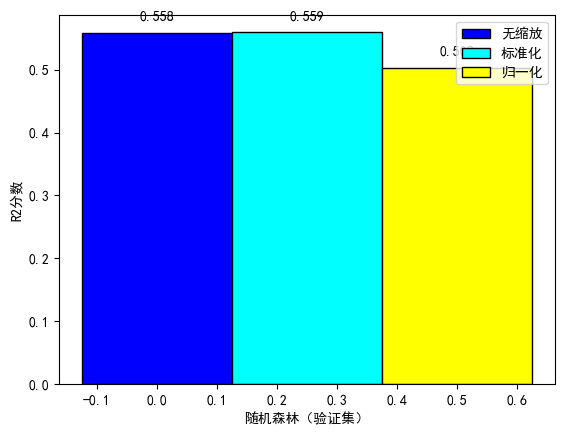

In [18]:
import numpy as np

fig, ax = plt.subplots()    
width = 0.25

# 柱子数据

bars1 = [r2_score(y_valid, model_rfr.predict(X_valid))]
bars2 = [r2_score(y_valid, model_rfr_standard.predict(X_valid_standard))]
bars3 = [r2_score(y_valid, model_rfr_minmax.predict(X_valid_minmax))]
 
# 柱状图x轴位置
r1 = np.arange(len(bars1))
r2 = [x + width for x in r1]
r3 = [x + width*2 for x in r1]
 
# 柱状图
plt.bar(r1, bars1, width = width, color = 'blue', edgecolor = 'black', capsize=7, label='无缩放')
plt.bar(r2, bars2, width = width, color = 'cyan', edgecolor = 'black', capsize=7, label='标准化')
plt.bar(r3, bars3, width = width, color = 'yellow', edgecolor = 'black', capsize=7, label='归一化')

# 布局
plt.ylabel('R2分数')
plt.xlabel('随机森林（验证集）')
plt.legend()

# 数值标签
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i/50+x[i], round(y[i], 3)+0.02, round(y[i], 3), ha = 'center')
addlabels(r1, bars1)
addlabels(r2, bars2)
addlabels(r3, bars3)

# 绘图
plt.show()